# **Introdução**

# 1. Importando Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

# 2. Leitura e Pré-processamento de Dados

### 2.1 Dataframe recebe CSV

In [25]:
df = pd.read_csv("datasets/cancer-death-rates-by-age.csv")

In [26]:
df

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


### Criando um array com o nome de todas as entidades do Dataframe

In [27]:
valores_unicos = df['Entity'].unique()
valores_unicos

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

### Separando as entidades por regiões

In [28]:
#regions

array_regions = []

for palavra in valores_unicos:
    if 'Region' in palavra or 'WB' in palavra or 'WHO' in palavra:
        array_regions.append(palavra)

df_regions= pd.DataFrame(array_regions, columns=['Regions'])

print(df_regions)

                              Regions"
0                 African Region (WHO)
1             East Asia & Pacific (WB)
2   Eastern Mediterranean Region (WHO)
3           Europe & Central Asia (WB)
4                European Region (WHO)
5       Latin America & Caribbean (WB)
6      Middle East & North Africa (WB)
7                   North America (WB)
8         Region of the Americas (WHO)
9                      South Asia (WB)
10        South-East Asia Region (WHO)
11             Sub-Saharan Africa (WB)
12        Western Pacific Region (WHO)


### Retirando as entidades que não são países

In [56]:
#retirando

# Obter os valores únicos da coluna 'Entity' que atendem ao critério
valores_unicos = df['Entity'].unique()
array_not_a_country = []

for palavra in valores_unicos:
    if 'G20' in palavra or 'WB' in palavra or 'WHO' in palavra or 'Income' in palavra:
        array_not_a_country.append(palavra)

df_not_a_country = pd.DataFrame(array_regions, columns=['Regions'])


In [57]:
# Eliminar os valores presentes em df_regions do DataFrame df
df = df[~df['Entity'].isin(df_regions['Regions'])]

# Exibir o DataFrame após a eliminação
print("\nDataFrame após a eliminação:")
df


DataFrame após a eliminação:


,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


### Agrupamento dos países de acordo com a renda

In [29]:
#países de acordo com a renda
array_country_income = []

for palavra in valores_unicos:
    if 'Income' in palavra:
        array_country_income.append(palavra)

df_country_income= pd.DataFrame(array_country_income, columns=['Country Income'])

print(df_country_income)

                   Country Income
0          World Bank High Income
1           World Bank Low Income
2  World Bank Lower Middle Income
3  World Bank Upper Middle Income


## 2.2 Limpeza e Transformação de Dados Necessários

*Para facilitar a manipulação das colunas, abreviamos Deaths - Neoplasms - Sex: Both - Age para **DNS**




In [30]:
df = df.rename(columns={ "Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)": "| DNS < 5 |",
                "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)": "DNS Padronizado",
                "Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)": "| DNS all ages |",
                "Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)" : "DNS > 70",
                "Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)" : "| 5 < DNS < 14 |",
                "Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)" : "50 < DNS < 69",
                "Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)" : "| 15 < DNS < 49 |" })

*Alinhamento das colunas*



In [31]:
df.head().style.set_table_styles([dict(selector='th', props=[('text-align', 'center')]),
                                    dict(selector='td', props=[('text-align', 'center')])])

,Entity,Code,Year,| DNS < 5 |,DNS Padronizado,| DNS all ages |,DNS > 70,| 5 < DNS < 14 |,50 < DNS < 69,| 15 < DNS < 49 |
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716


In [ ]:
#Verificando a existência de valores NaN  e se isso vai interferir
df.info()

Não há valores NaN nas colunas DNS. Há apenas na coluna Code

Lembrar:


*   Verificar o que não é país dentro da coluna Entity (já foi feito)
*   Alterar a ordem das colunas. Começar com < 5, e assim por diante



## 2.3 Medidas de Centralidade

### Medianas

In [33]:
#medianas das taxas de mortalidade de acordo com o país e o grupo etário

colunas = df.columns[3:]

medians = {}

for coluna in colunas:
    medians[coluna] = df.groupby('Entity')[coluna].median().sort_values()

    # Exibir as medianas calculadas para cada coluna
for coluna, medianas in medians.items():
    print(f"Mediana da coluna '{coluna}':")
    print(medianas)
    print()

Mediana da coluna '| DNS < 5 |':
Entity
Botswana         1.968592
Zimbabwe         1.993693
South Africa     2.033127
Lesotho          2.054594
Namibia          2.464861
                  ...    
South Sudan     21.976327
Mozambique      22.687614
Tanzania        24.856362
Ethiopia        26.376406
Malawi          36.728320
Name: | DNS < 5 |, Length: 228, dtype: float64

Mediana da coluna 'DNS Padronizado':
Entity
Kuwait           73.004887
Algeria          78.007058
Syria            78.273054
Saudi Arabia     78.438384
Bhutan           80.022767
                   ...    
Brunei          204.150039
Hungary         221.543440
Monaco          237.820515
Greenland       274.019022
Mongolia        306.214952
Name: DNS Padronizado, Length: 228, dtype: float64

Mediana da coluna '| DNS all ages |':
Entity
Niger            29.411725
Qatar            31.785496
Oman             32.282991
Saudi Arabia     32.288943
Kuwait           34.171910
                   ...    
Germany         311.065990

In [48]:
#desvio padrão

std = {}
for coluna in colunas:
    std[coluna] = df.groupby('Entity')[coluna].std().sort_values(ascending=False)

    # Exibir as medianas calculadas para cada coluna
for coluna, stds in std.items():
    print(f"Mediana da coluna '{coluna}':")
    print(stds)
    print()

Mediana da coluna '| DNS < 5 |':
Entity
Malawi                   16.733185
Ethiopia                  9.852456
Zambia                    6.079012
China                     5.782183
Sao Tome and Principe     4.985008
                           ...    
Guam                      0.371905
Brunei                    0.367504
Oman                      0.354885
American Samoa            0.217923
Mauritius                 0.148004
Name: | DNS < 5 |, Length: 228, dtype: float64

Mediana da coluna 'DNS Padronizado':
Entity
Lesotho                            28.512498
Greenland                          25.738887
Eswatini                           24.267041
Bulgaria                           21.611239
Singapore                          21.507873
                                     ...    
Niue                                1.449754
Sub-Saharan Africa (WB)             1.420358
Middle East & North Africa (WB)     1.397558
Tokelau                             1.325354
African Region (WHO)             

### Desvio Padrão

In [49]:
# 10 Países com maiores taxas de mortalidade
for coluna, stds in std.items():  
  print(stds.tail(5))
  print()

Entity
Guam              0.371905
Brunei            0.367504
Oman              0.354885
American Samoa    0.217923
Mauritius         0.148004
Name: | DNS < 5 |, dtype: float64

Entity
Niue                               1.449754
Sub-Saharan Africa (WB)            1.420358
Middle East & North Africa (WB)    1.397558
Tokelau                            1.325354
African Region (WHO)               1.067228
Name: DNS Padronizado, dtype: float64

Entity
Sudan                      1.100909
Sub-Saharan Africa (WB)    1.000488
African Region (WHO)       0.862783
Niger                      0.780801
Benin                      0.760178
Name: | DNS all ages |, dtype: float64

Entity
Europe & Central Asia (WB)        12.869326
Comoros                           12.548318
Japan                             11.044074
World Bank Lower Middle Income     9.950652
South Sudan                        9.472375
Name: DNS > 70, dtype: float64

Entity
Democratic Republic of Congo    0.110592
African Region (WHO)   

# 3. Exploração através de gráficos

## Gráficos de barra

In [44]:
df_latam = df.loc[(df['Entity'] == 'Latin America & Caribbean')]

### Monaco

#### Taxa de mortalidade ao longo dos anos em Monaco

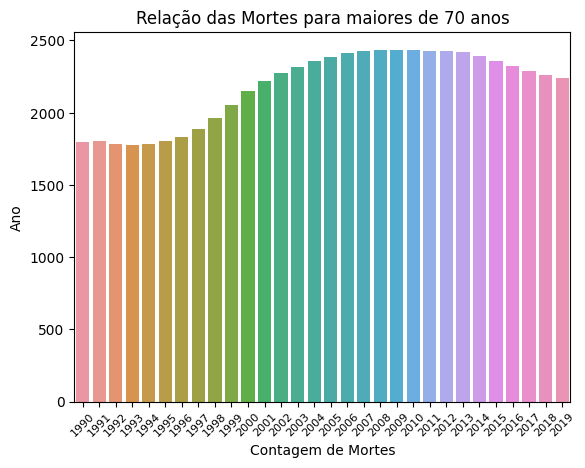

In [33]:
df_monaco = df.loc[(df['Entity']=='Monaco')]
sns.barplot(data=df_monaco, x='Year', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()


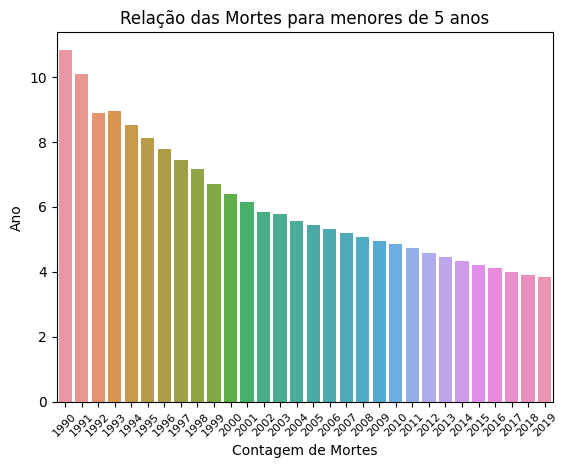

In [34]:
df_monaco = df.loc[(df['Entity']=='Monaco')]
sns.barplot(data=df_monaco, x='Year', y='| DNS < 5 |').set(title="Relação das Mortes para menores de 5 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

### South Sudan

#### Taxa de mortalidade ao longo dos anos em South Sudan

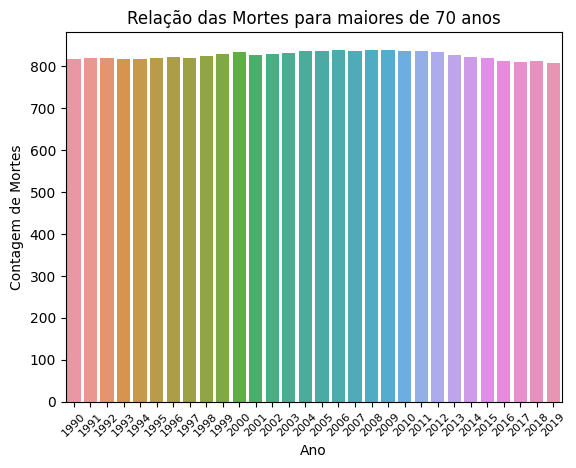

In [43]:
df_South_Sudan = df.loc[(df['Entity']=='South Sudan')]
sns.barplot(data=df_South_Sudan, x='Year', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")
plt.ylabel('Contagem de Mortes')
plt.xlabel('Ano')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

### Russia 

#### Taxa de mortalidade ao longo nos anos em Russia

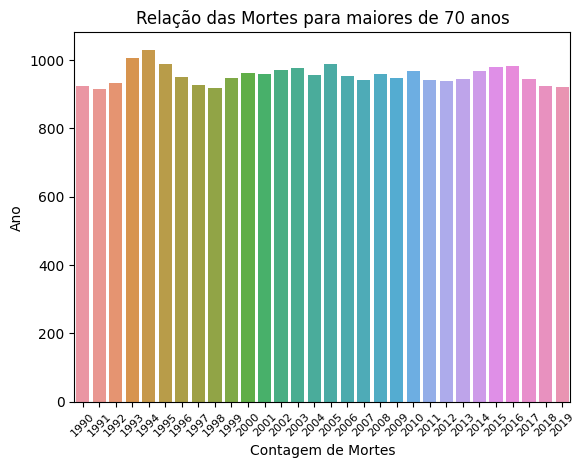

In [36]:
df_Russia = df.loc[(df['Entity']=='Russia')]
sns.barplot(data=df_Russia, x='Year', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

## Boxplots

### Russia

[Text(0.5, 1.0, 'Relação das Mortes para maiores de 70 anos')]

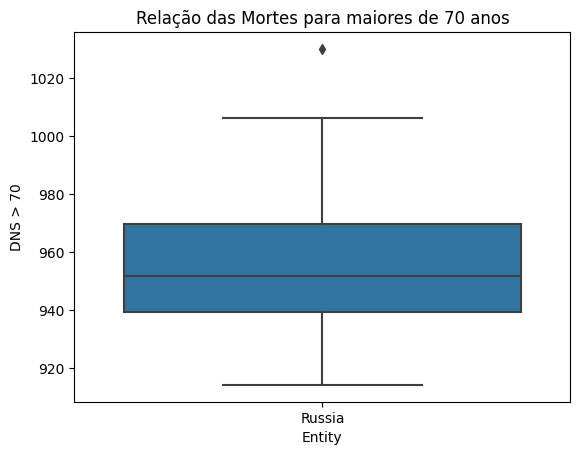

In [37]:
sns.boxplot(data=df_Russia, x='Entity', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")

### BRICS

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas com mais de 70 anos) dos países do BRICS')

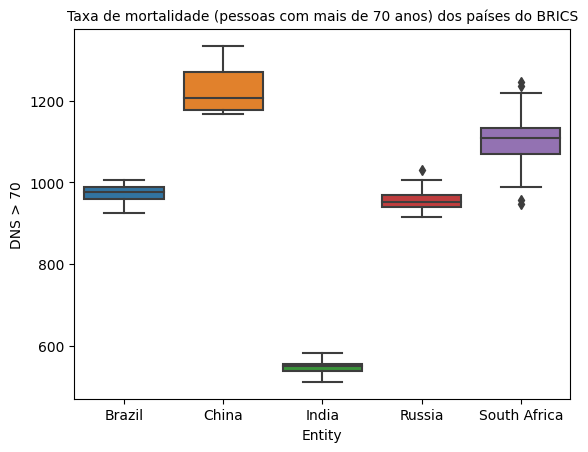

In [37]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='DNS > 70')
plt.title('Taxa de mortalidade (pessoas com mais de 70 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas entre 50 e 69 anos) dos países do BRICS')

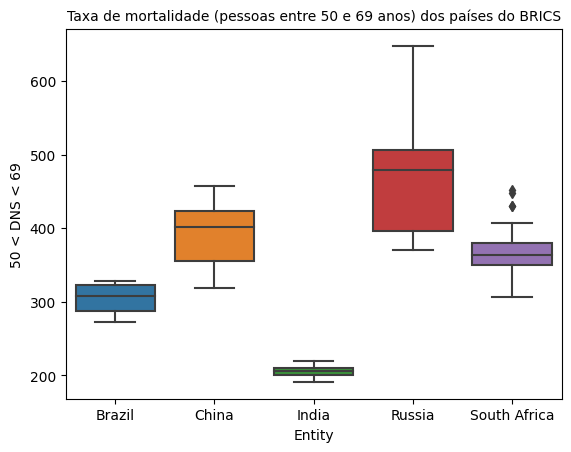

In [38]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='50 < DNS < 69')
plt.title('Taxa de mortalidade (pessoas entre 50 e 69 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas entre 5 e 14 anos) dos países do BRICS')

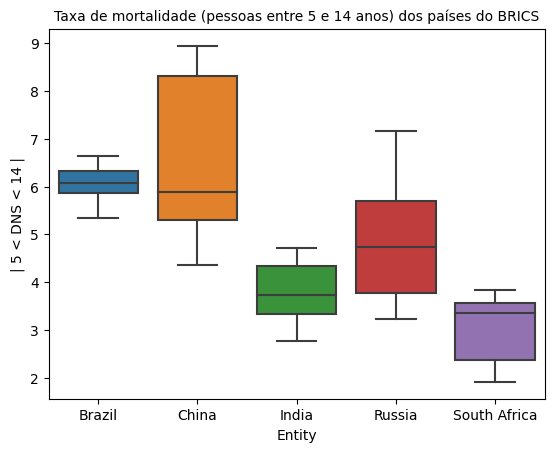

In [39]:

df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='| 5 < DNS < 14 |')
plt.title('Taxa de mortalidade (pessoas entre 5 e 14 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (crianças menores de 5 anos) dos países do BRICS')

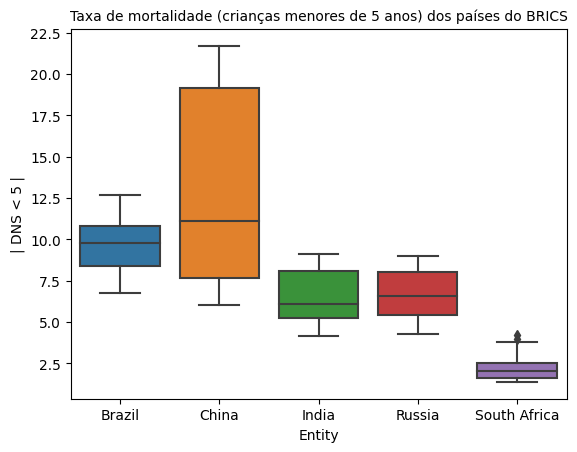

In [40]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='| DNS < 5 |')
plt.title('Taxa de mortalidade (crianças menores de 5 anos) dos países do BRICS',fontsize=10)

# 4. Perguntas

Rascunho:


* Qual a faixa etária que mais morre nesses países? (responder através de gráfico de barras)
* Qual o país mais constante? (responder através de gráficos do k-means)
* Qual o país com maior queda de casos nos últimos 5 anos?
* Em qual ano mais países tiveram altas em suas taxas?
* Qual o país com o maior investimento público em saúde? 
* E qual o país com o menor investimento?






## Etapa de Clusterização

In [41]:
from sklearn.cluster import KMeans

c:\Users\dorie\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dorie\AppData\Local\Temp\ipykernel_138448\1276686386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_brics['Cluster'] = kmeans.labels_


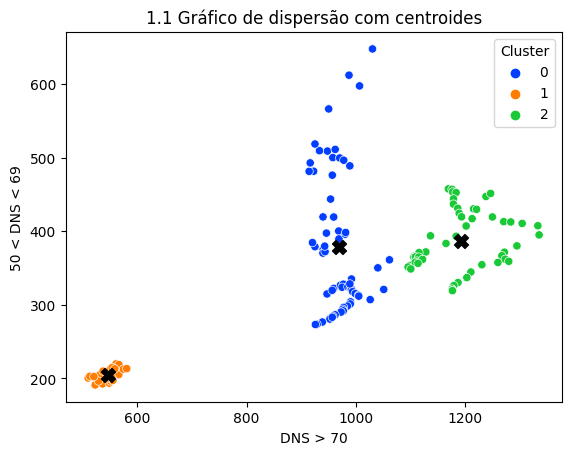

In [42]:
kbrics = df_filtered_brics[['DNS > 70', '50 < DNS < 69']]

# Definir o número de clusters
k = 3

# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(kbrics)
centroides = kmeans.cluster_centers_

# Adicionar as colunas de cluster ao DataFrame original
df_filtered_brics['Cluster'] = kmeans.labels_

# Visualizar os resultados do cluster
sns.scatterplot(data=df_filtered_brics, x='DNS > 70', y='50 < DNS < 69', hue='Cluster', palette='bright')

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', color='black', s=100)

# Configurações adicionais do gráfico
plt.xlabel('DNS > 70')
plt.ylabel('50 < DNS < 69')
plt.title('1.1 Gráfico de dispersão com centroides')

# Exibir o gráfico
plt.show()

# 5. Conclusões

## Ideias

In [ ]:

''' Quero plotar mapa
# Dados
data = {
    'Country': ['Brazil', 'Argentina', 'Chile'],
    'Value': [10, 20, 30]
}

# GeoJSON com as geometrias dos países
geojson = 'caminho/para/arquivo.geojson'

# Plotagem do mapa de cloropleta
fig = px.choropleth_mapbox(data_frame=data, geojson=geojson, locations='Country', color='Value',
                           mapbox_style='carto-positron', center={'lat': 0, 'lon': 0}, zoom=2)

# Exibição do mapa
fig.show()
'''